In [8]:
!pip3 install torch torchvision torchaudio Cython --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [9]:
!pip3 install typing-extensions==4.3.0 opencv-python

In [10]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import torchvision.transforms as T
import cv2

In [11]:
nuclei_model = torch.load(get(2)) # update this number with real dataset number in history

/opt/conda/lib/python3.8/site-packages/torch/serialization.py:995: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


In [12]:
nuclei_model.eval()

RecursiveScriptModule(
  original_name=UNet2d
  (encoder): RecursiveScriptModule(
    original_name=Encoder
    (blocks): RecursiveScriptModule(
      original_name=ModuleList
      (0): RecursiveScriptModule(
        original_name=ConvBlock2d
        (block): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(original_name=InstanceNorm2d)
          (1): RecursiveScriptModule(original_name=Conv2d)
          (2): RecursiveScriptModule(original_name=ReLU)
          (3): RecursiveScriptModule(original_name=InstanceNorm2d)
          (4): RecursiveScriptModule(original_name=Conv2d)
          (5): RecursiveScriptModule(original_name=ReLU)
        )
      )
      (1): RecursiveScriptModule(
        original_name=ConvBlock2d
        (block): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(original_name=InstanceNorm2d)
          (1): RecursiveScriptModule(original_name=Conv2d)
          (2): RecursiveScri

Resized image: 



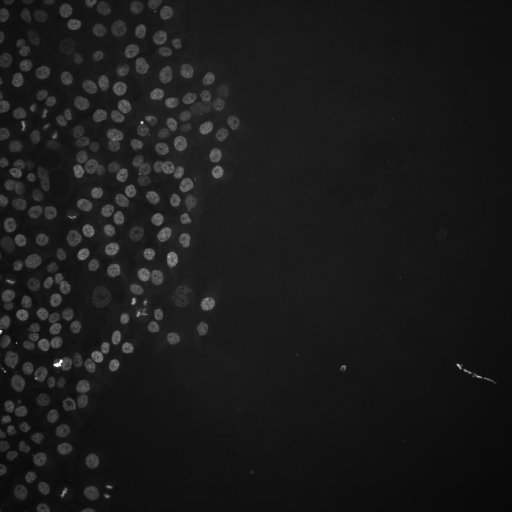

Predicted segmentations: 



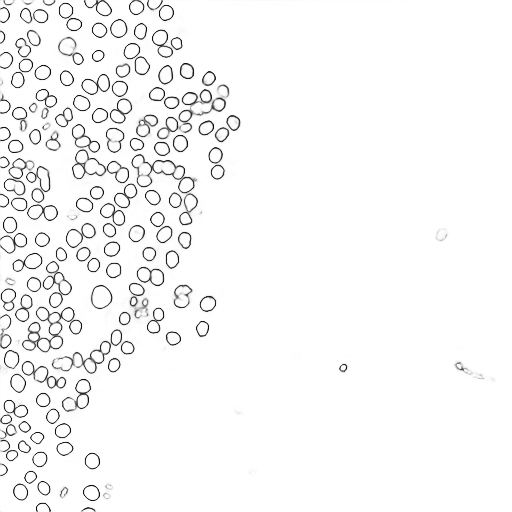

-------------------
Resized image: 



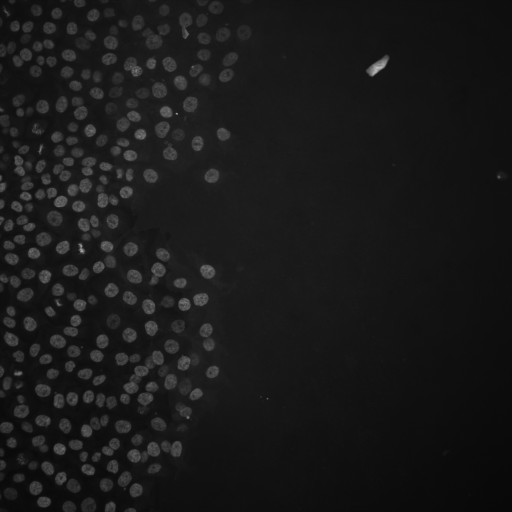

Predicted segmentations: 



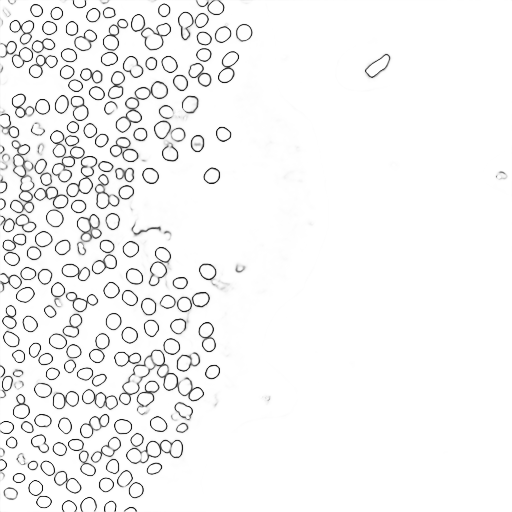

-------------------
Resized image: 



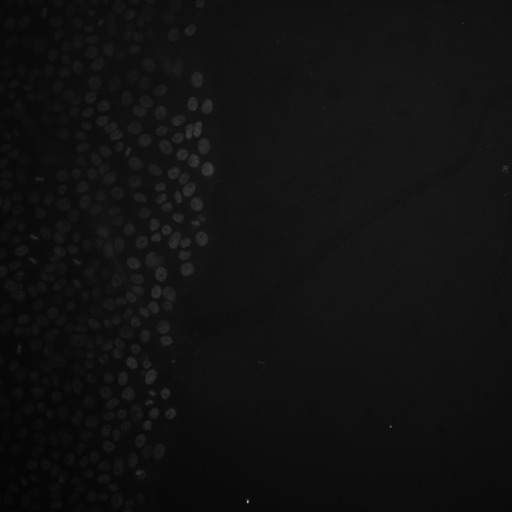

Predicted segmentations: 



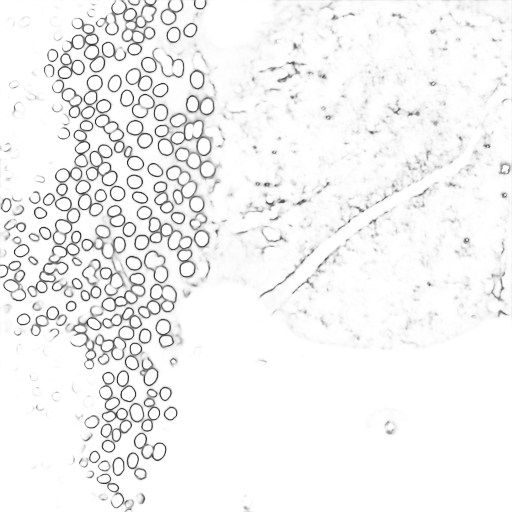

-------------------
Resized image: 



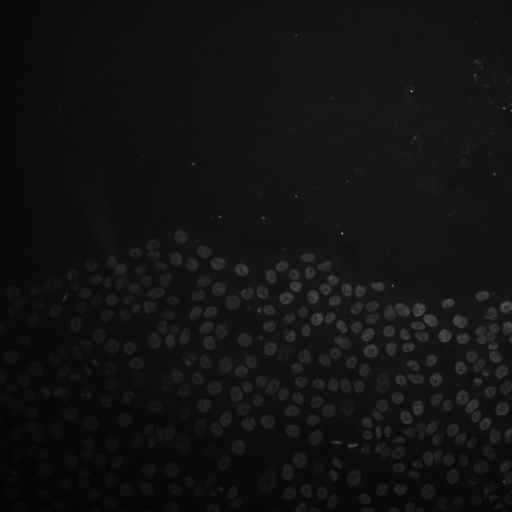

Predicted segmentations: 



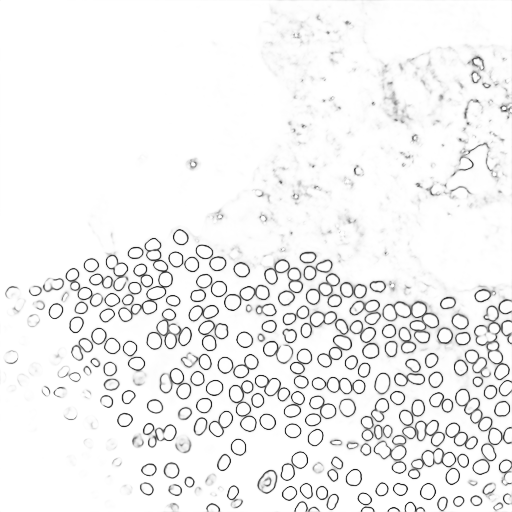

-------------------
Resized image: 



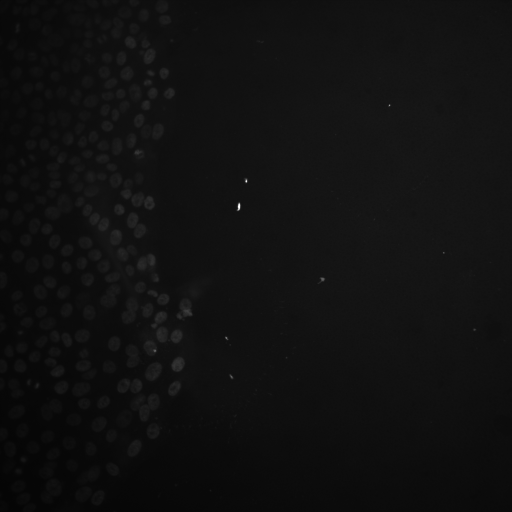

Predicted segmentations: 



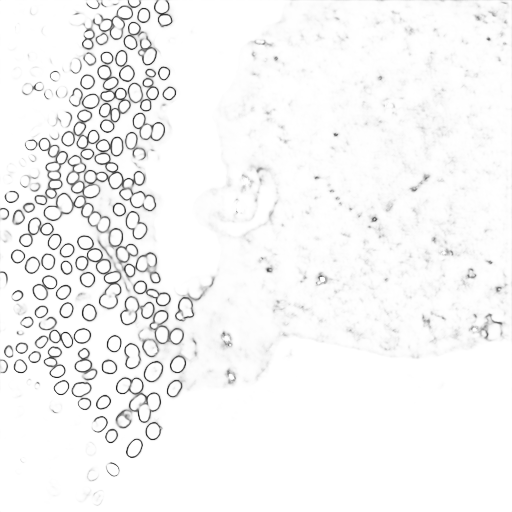

-------------------


In [13]:
transform = T.ToPILImage()

def predict_image_segmentations(s_index):
    
    # convert to gray scale
    img_gray_mode = cv2.imread(get(s_index), cv2.IMREAD_GRAYSCALE)
    
    tr_image = transform(img_gray_mode)
    
    # resize to half
    half_tr_image = cv2.resize(img_gray_mode, (512, 512))
    
    print("Resized image: \n")
    display(transform(half_tr_image))
    
    half_tr_image = torch.Tensor(half_tr_image)
    
    # add dimensions
    resized_half_tr_image = half_tr_image[None, None, :, :]
    
    # predict segmentations
    pred_image = nuclei_model(resized_half_tr_image)
    
    pred_img = transform(torch.squeeze(pred_image))
    
    print("Predicted segmentations: \n")
    display(pred_img)
    
    print("-------------------")

starting_dataset_index = 25 # update this number with real dataset number in history
number_images = 5

for i in range(number_images):
    starting_dataset_index
    predict_image_segmentations(starting_dataset_index)
    starting_dataset_index += 1